In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arr_weather_combo = pd.read_csv('Arrival_weather_combined.csv')
display(arr_weather_combo.head())

,Unnamed: 0,sched_arr_datetime (mod),arr_time,sched_arr_time,arr_delay,name,actual_delay,station,Wind Speed [in knots],Wind Gust [in knots],One hour precipitation [in inches],Pressure altimeter [in inches],Visibility [in miles],Sky Level 1 Coverage,Sky Level 2 Coverage,Sky Level 3 Coverage,Sky Level 4 Coverage
0,0,2013-01-01 08:53:00,09:24,09:17,7.0,United Air Lines Inc.,5.0,LAX,4.0,NaN,0.00,30.23,10.0,4.0,NaN,NaN,NaN
1,1,2013-01-01 10:53:00,10:27,10:25,2.0,Virgin America,0.0,LAX,5.0,NaN,0.00,30.24,10.0,4.0,NaN,NaN,NaN
2,2,2013-01-01 09:53:00,10:58,10:14,44.0,JetBlue Airways,46.0,LAX,4.0,NaN,0.00,30.25,10.0,3.0,NaN,NaN,NaN
3,3,2013-01-01 10:53:00,11:07,11:00,7.0,American Airlines Inc.,20.0,LAX,5.0,NaN,0.00,30.24,10.0,4.0,NaN,NaN,NaN
4,4,2013-01-01 11:53:00,11:52,12:00,-8.0,United Air Lines Inc.,-9.0,LAX,3.0,NaN,0.00,30.21,10.0,4.0,NaN,NaN,NaN


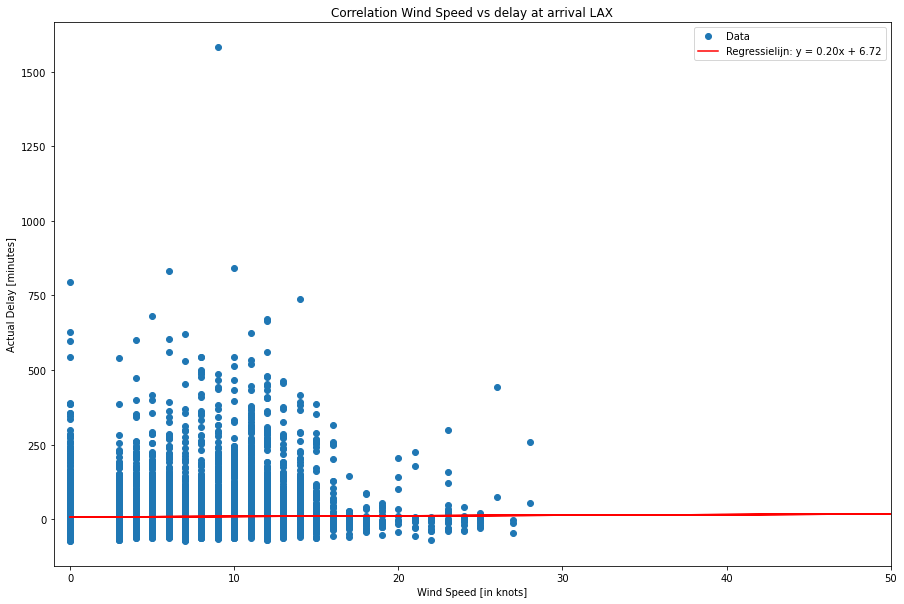

In [3]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Wind Speed [in knots]'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
windspeed_clean = arr_weather_combo['Wind Speed [in knots]'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(windspeed_clean, delay_clean,  1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(windspeed_clean, delay_clean, 'o', label='Data')
plt.plot(windspeed_clean, m*windspeed_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Wind Speed vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Wind Speed [in knots]')
plt.xlim(-1, 50)
plt.legend()
plt.show()

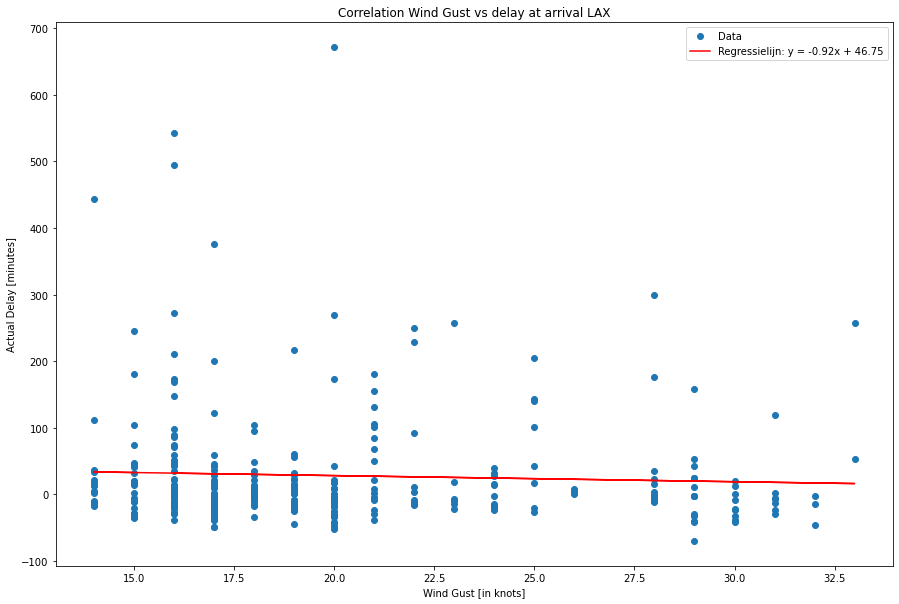

In [4]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Wind Gust [in knots]'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
windgust_clean = arr_weather_combo['Wind Gust [in knots]'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(windgust_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(windgust_clean, delay_clean, 'o', label='Data')
plt.plot(windgust_clean, m*windgust_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Wind Gust vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Wind Gust [in knots]')
plt.legend()
plt.show()

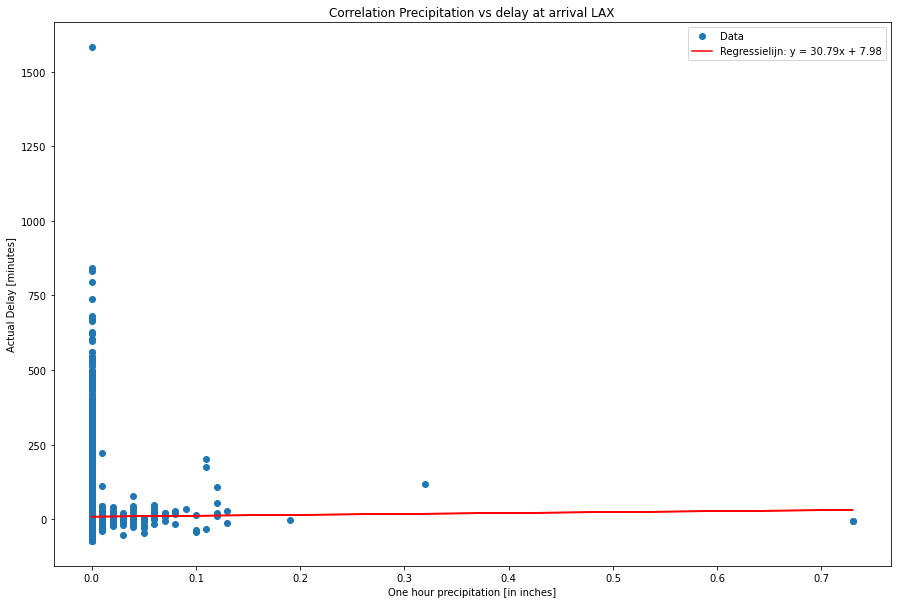

In [5]:
# As T is almost equal to zero, replace T to 0 so a regression line can be calculated
arr_weather_combo['One hour precipitation [in inches]'] = arr_weather_combo['One hour precipitation [in inches]'].replace('T', 0)
arr_weather_combo['One hour precipitation [in inches]'] = pd.to_numeric(arr_weather_combo['One hour precipitation [in inches]'], errors='coerce')

# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['One hour precipitation [in inches]'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
rain_clean = arr_weather_combo['One hour precipitation [in inches]'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(rain_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(rain_clean, delay_clean, 'o', label='Data')
plt.plot(rain_clean, m*rain_clean + b, color='red', label=f'Regressielijn: y = {m:.2f}x + {b:.2f}')
plt.title('Correlation Precipitation vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('One hour precipitation [in inches]')
plt.legend()
plt.show()

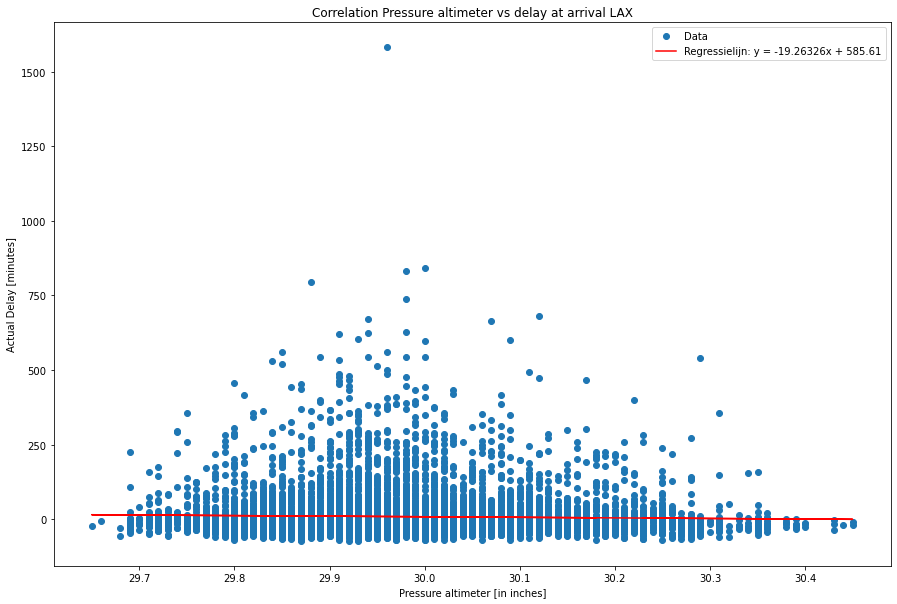

In [6]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Pressure altimeter [in inches]'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
pressure_clean = arr_weather_combo['Pressure altimeter [in inches]'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(pressure_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(pressure_clean, delay_clean, 'o', label='Data')
plt.plot(pressure_clean, m*pressure_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Pressure altimeter vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Pressure altimeter [in inches]')
plt.legend()
plt.show()

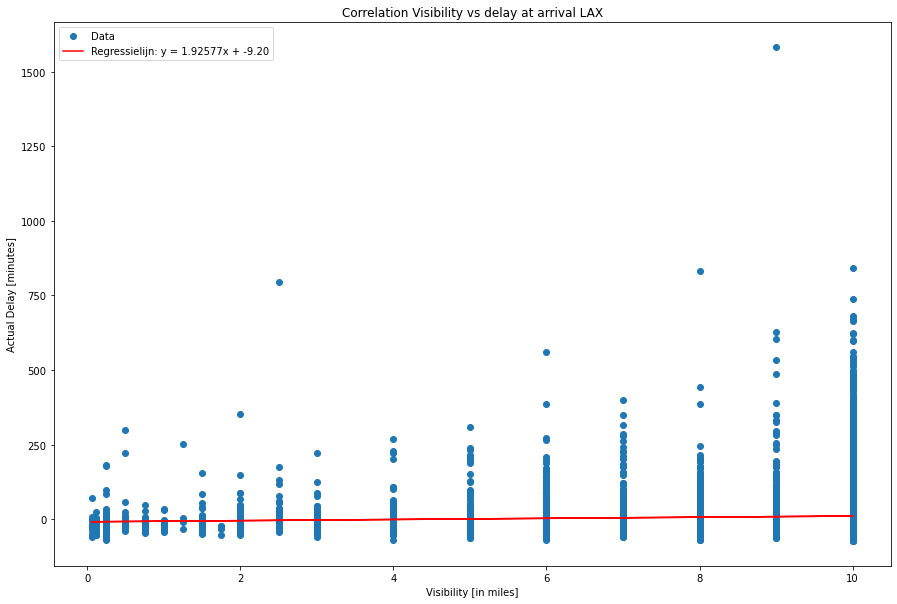

In [7]:
arr_weather_combo['Visibility [in miles]'] = arr_weather_combo['Visibility [in miles]'].replace(20, 10)

# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Visibility [in miles]'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
vis_clean = arr_weather_combo['Visibility [in miles]'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(vis_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(vis_clean, delay_clean, 'o', label='Data')
plt.plot(vis_clean, m*vis_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Visibility vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Visibility [in miles]')
plt.legend()
plt.show()

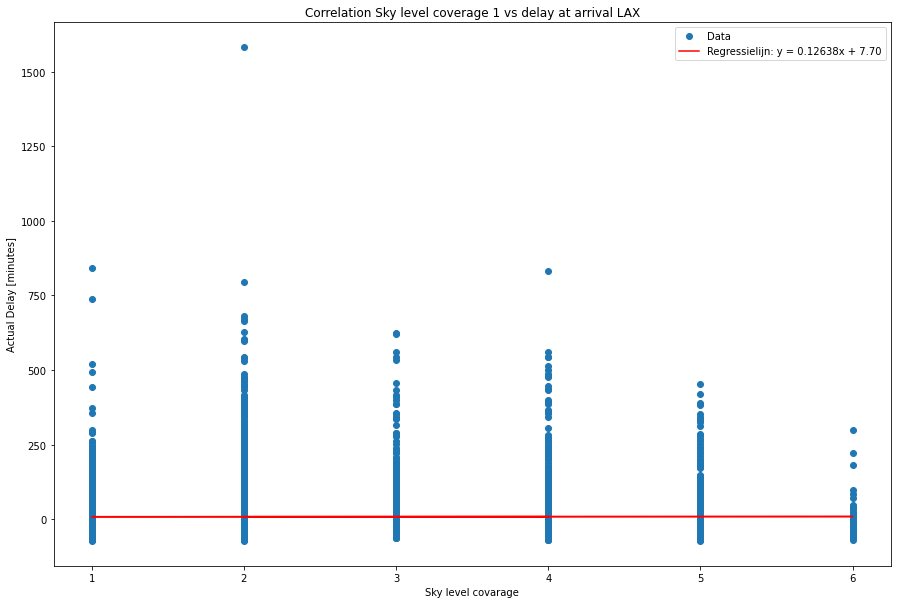

In [8]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Sky Level 1 Coverage'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
sky1_clean = arr_weather_combo['Sky Level 1 Coverage'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(sky1_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky1_clean, delay_clean, 'o', label='Data')
plt.plot(sky1_clean, m*sky1_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 1 vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

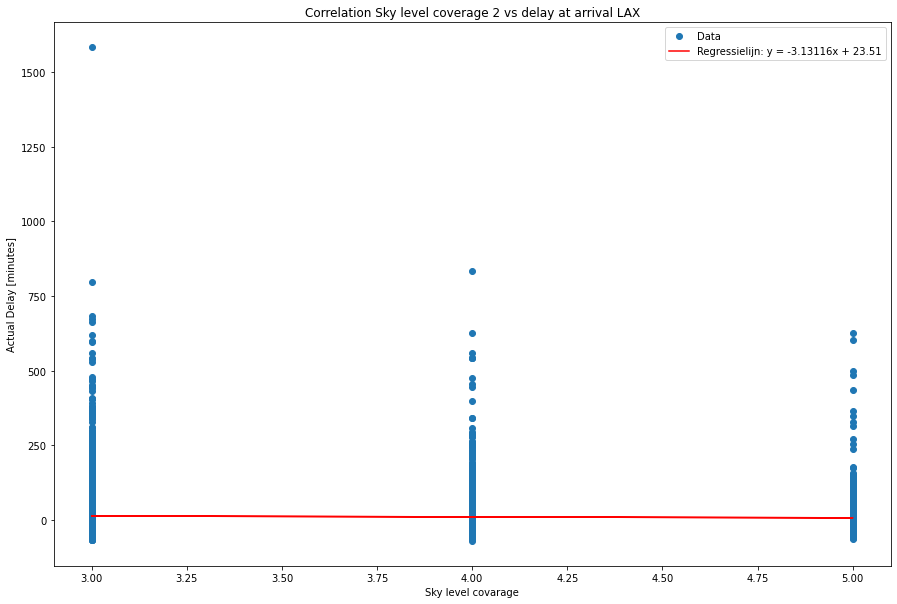

In [9]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Sky Level 2 Coverage'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
sky2_clean = arr_weather_combo['Sky Level 2 Coverage'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(sky2_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky2_clean, delay_clean, 'o', label='Data')
plt.plot(sky2_clean, m*sky2_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 2 vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

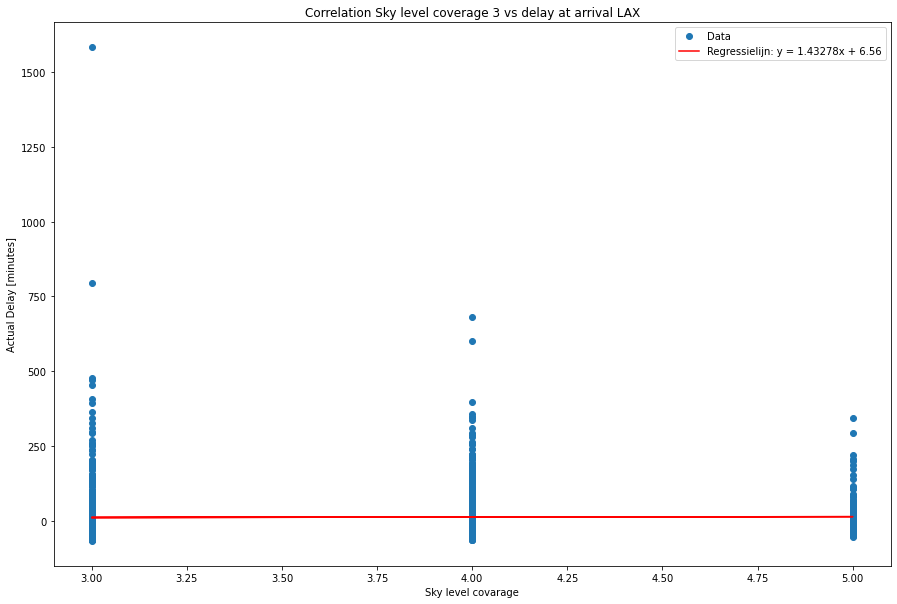

In [10]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Sky Level 3 Coverage'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
sky3_clean = arr_weather_combo['Sky Level 3 Coverage'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(sky3_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky3_clean, delay_clean, 'o', label='Data')
plt.plot(sky3_clean, m*sky3_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 3 vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()

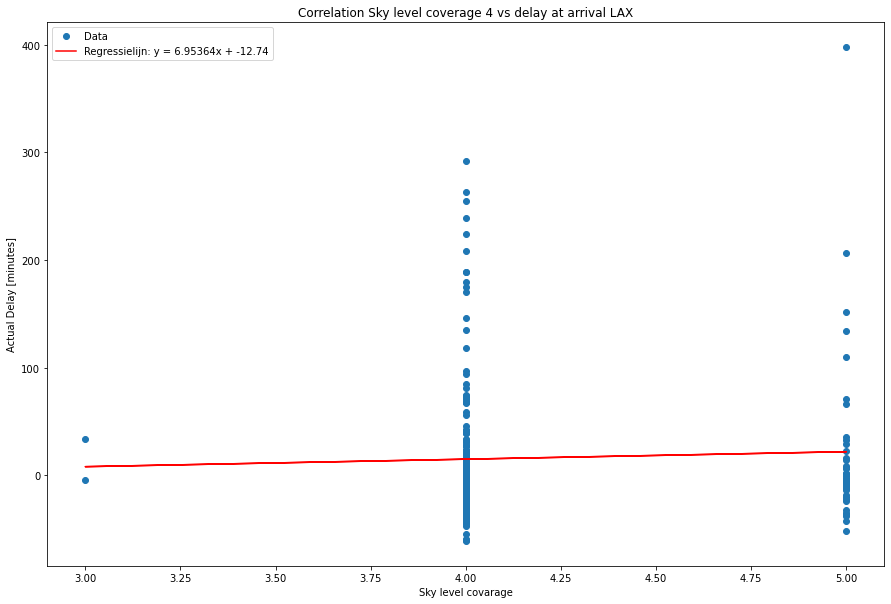

In [11]:
# The not numerical values are not used for plotting
valid_mask = np.isfinite(arr_weather_combo['actual_delay']) & np.isfinite(arr_weather_combo['Sky Level 4 Coverage'])

delay_clean = arr_weather_combo['actual_delay'][valid_mask]
sky4_clean = arr_weather_combo['Sky Level 4 Coverage'][valid_mask]

# Calculating the regression line
m, b = np.polyfit(sky4_clean, delay_clean, 1)

#Plotting the scatterplot and regression line
plt.figure(figsize = (15, 10))
plt.plot(sky4_clean, delay_clean, 'o', label='Data')
plt.plot(sky4_clean, m*sky4_clean + b, color='red', label=f'Regressielijn: y = {m:.5f}x + {b:.2f}')
plt.title('Correlation Sky level coverage 4 vs delay at arrival LAX')
plt.ylabel('Actual Delay [minutes]')
plt.xlabel('Sky level covarage')
plt.legend()
plt.show()